In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

# Explain the definitions of the variables in each table/plot
# Comment on the main features of each plot
# Include suitable labels and keys for each plot
# Make sure all plots would be readable if printed in black & white, and adjust the point sizes and/or line thicknesses to improve readability
# Lay out all tables so that they are clearly readable and clearly labelled, and do not use excessive significant figures

# Exploratory Data Analysis
## Basic information about data

In [8]:
df = pd.read_csv("../Data/project_data.csv")

# Dropping redundant features
df = df.iloc[: , 1:]

In [9]:
df.head()

,id,result,age,gender,race,marital_status,family_PIR,education_level_adults,language,sleep_hours,...,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD140,WHQ150
0,31139,0,18,2,2,5.0,4.91,NaN,1.0,6.0,...,62.0,160.0,3.0,3.0,190.0,NaN,NaN,NaN,190.0,17.0
1,31143,0,19,1,3,5.0,5.00,NaN,1.0,7.0,...,73.0,160.0,3.0,3.0,150.0,2.0,NaN,NaN,160.0,19.0
2,31150,0,79,1,3,3.0,1.22,3.0,1.0,8.0,...,69.0,190.0,3.0,3.0,190.0,2.0,190.0,170.0,227.0,38.0
3,31151,0,59,2,4,1.0,3.03,3.0,1.0,2.0,...,67.0,180.0,1.0,2.0,250.0,2.0,365.0,145.0,365.0,57.0
4,31152,0,27,2,1,1.0,1.76,3.0,1.0,8.0,...,59.0,214.0,1.0,2.0,214.0,1.0,NaN,195.0,214.0,26.0


In [10]:
df.shapeu

(26473, 29)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26473 non-null  int64  
 1   result                    26473 non-null  int64  
 2   age                       26473 non-null  int64  
 3   gender                    26473 non-null  int64  
 4   race                      26473 non-null  int64  
 5   marital_status            25136 non-null  float64
 6   family_PIR                24209 non-null  float64
 7   education_level_adults    24791 non-null  float64
 8   language                  25899 non-null  float64
 9   sleep_hours               26371 non-null  float64
 10  trouble_sleeping_history  26473 non-null  int64  
 11  drinks_per_occasion       17426 non-null  float64
 12  SMQ020                    25477 non-null  float64
 13  SMD030                    11662 non-null  float64
 14  SMQ040

In [39]:
df.isnull().sum()

id                              0
result                          0
age                             0
gender                          0
race                            0
marital_status               1337
family_PIR                   2264
education_level_adults       1682
language                      574
sleep_hours                   102
trouble_sleeping_history        0
drinks_per_occasion          9047
SMQ020                        996
SMD030                      14811
SMQ040                      14773
SMD641                      20351
SMD650                      20557
SMD630                      25897
SMQ670                      23435
WHD010                        507
WHD020                        441
WHQ030                         57
WHQ040                         30
WHD050                        496
WHQ070                       3428
WHD110                       9339
WHD120                       5845
WHD140                        417
WHQ150                        515
dtype: int64

In [12]:
df.describe()

,id,result,age,gender,race,marital_status,family_PIR,education_level_adults,language,sleep_hours,...,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD140,WHQ150
count,26473.000000,26473.000000,26473.000000,26473.000000,26473.000000,25136.000000,24209.000000,24791.000000,25899.000000,26371.000000,...,25966.000000,26032.000000,26416.000000,26443.000000,25977.000000,23045.000000,17134.000000,20628.000000,26056.000000,25958.000000
mean,74082.726476,0.145469,46.990179,1.550939,3.022740,2.458028,2.402194,3.422895,1.083478,7.050301,...,66.297427,179.812846,1.828816,2.173619,179.895292,1.610979,174.142991,153.538734,197.254874,39.600200
std,27435.912883,0.352580,18.765959,0.497408,1.153953,1.753767,1.614494,1.238035,0.276609,1.620545,...,4.131303,48.201363,0.952713,0.574853,50.439976,0.487539,46.994284,40.216912,55.766381,17.203086
min,31139.000000,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,41.000000,70.000000,1.000000,1.000000,60.000000,1.000000,70.000000,50.000000,73.000000,7.000000
25%,51042.000000,0.000000,30.000000,1.000000,2.000000,1.000000,1.030000,3.000000,1.000000,6.000000,...,63.000000,145.000000,1.000000,2.000000,145.000000,1.000000,140.000000,125.000000,160.000000,25.000000
50%,70401.000000,0.000000,46.000000,2.000000,3.000000,2.000000,1.950000,4.000000,1.000000,7.000000,...,66.000000,173.000000,1.000000,2.000000,172.000000,2.000000,165.000000,145.000000,187.000000,37.000000
75%,90581.000000,0.000000,62.000000,2.000000,4.000000,4.000000,3.820000,4.000000,1.000000,8.000000,...,69.000000,205.000000,3.000000,3.000000,206.000000,2.000000,198.000000,175.000000,226.000000,52.000000
max,124822.000000,1.000000,85.000000,2.000000,5.000000,6.000000,5.000000,9.000000,2.000000,14.500000,...,83.000000,600.000000,3.000000,3.000000,618.000000,2.000000,700.000000,530.000000,700.000000,85.000000


In [13]:
df.duplicated().sum()

0

## Summary Table
### Categorical Summary

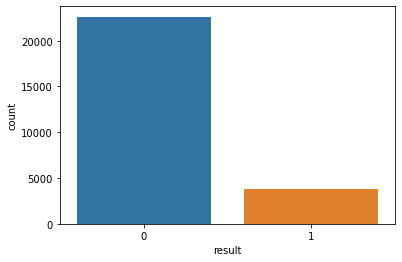

<Figure size 432x288 with 0 Axes>

In [47]:
sns_plot = sns.countplot(x = 'result',
              data = df,
              order = df['result'].value_counts().index)
plt.show()

plt.savefig('../Output/imbalanced.png')

### Numerical Summary

/Users/viviandong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'result'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'race'}>],
       [<AxesSubplot:title={'center':'marital_status'}>,
        <AxesSubplot:title={'center':'family_PIR'}>,
        <AxesSubplot:title={'center':'education_level_adults'}>,
        <AxesSubplot:title={'center':'language'}>,
        <AxesSubplot:title={'center':'sleep_hours'}>],
       [<AxesSubplot:title={'center':'trouble_sleeping_history'}>,
        <AxesSubplot:title={'center':'drinks_per_occasion'}>,
        <AxesSubplot:title={'center':'SMQ020'}>,
        <AxesSubplot:title={'center':'SMD030'}>,
        <AxesSubplot:title={'center':'SMQ040'}>],
       [<AxesSubplot:title={'center':'SMD641'}>,
        <AxesSubplot:title={'center':'SMD650'}>,
        <AxesSubplot:title={'center':'SMD630'}>,
        <AxesSubplot:title={'center':'SMQ670'}>,
        <

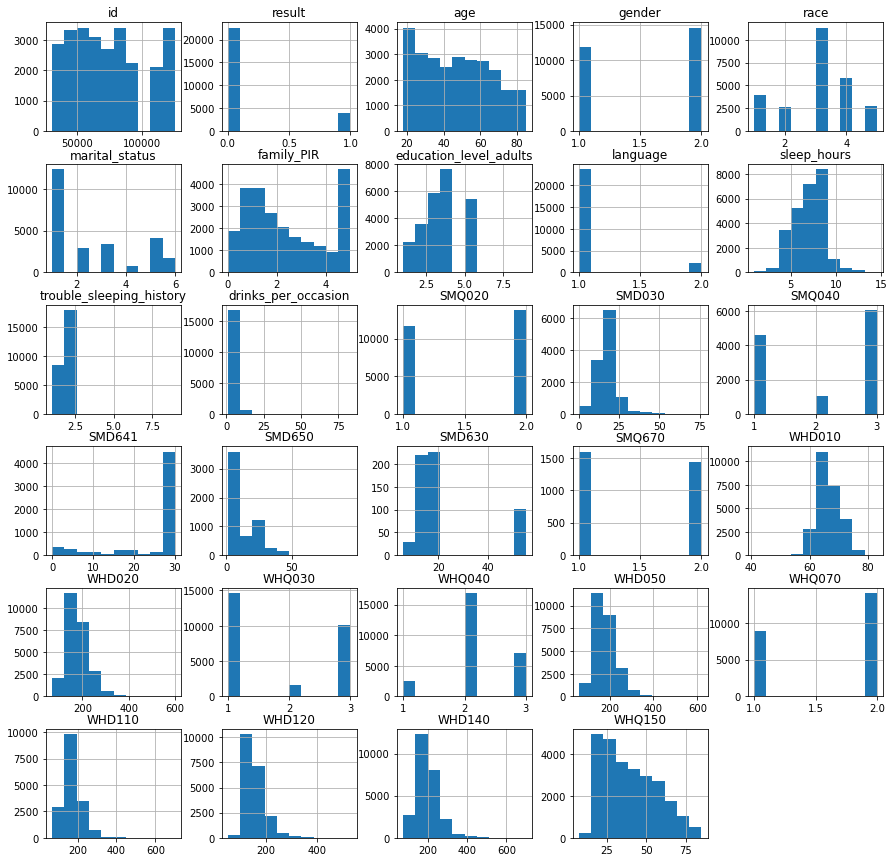

In [46]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)

### Correlation

In [14]:
df.corr()

,id,result,age,gender,race,marital_status,family_PIR,education_level_adults,language,sleep_hours,...,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD140,WHQ150
id,1.000000,0.018115,0.052074,-0.003325,0.113783,-0.186150,0.005992,0.091549,0.011683,0.205624,...,-0.017785,0.051076,0.000191,-0.029101,0.057024,-0.049507,0.066684,0.044721,0.073087,0.024883
result,0.018115,1.000000,0.009174,0.062969,-0.018901,0.065071,-0.169609,-0.125712,0.017729,-0.062932,...,-0.046543,0.051139,-0.065493,-0.053506,0.052033,-0.009622,0.038354,0.018831,0.087543,0.004395
age,0.052074,0.009174,1.000000,0.014178,0.012338,-0.377592,0.077577,-0.121502,-0.040616,0.007939,...,-0.086271,0.026913,-0.083919,0.092908,0.076865,0.059672,0.006519,-0.210460,0.075810,0.808000
gender,-0.003325,0.062969,0.014178,1.000000,-0.008797,0.000688,-0.033939,0.022163,0.001407,0.049698,...,-0.668294,-0.274348,-0.150075,-0.021883,-0.274193,-0.153371,-0.323079,-0.422799,-0.247408,0.045594
race,0.113783,-0.018901,0.012338,-0.008797,1.000000,0.023678,0.113018,0.273591,-0.426035,-0.050060,...,0.119377,0.024731,0.058519,-0.018544,0.030065,0.023360,0.024275,0.035842,0.028339,-0.000985
marital_status,-0.186150,0.065071,-0.377592,0.000688,0.023678,1.000000,-0.204950,-0.034750,0.004216,-0.038520,...,0.030458,-0.027922,0.070338,-0.041557,-0.046014,0.027869,-0.009715,0.063587,-0.029072,-0.316785
family_PIR,0.005992,-0.169609,0.077577,-0.033939,0.113018,-0.204950,1.000000,0.442386,-0.195154,0.000631,...,0.106781,0.015899,-0.061040,-0.000373,0.024556,-0.107253,0.019030,0.025703,-0.010373,0.083468
education_level_adults,0.091549,-0.125712,-0.121502,0.022163,0.273591,-0.034750,0.442386,1.000000,-0.296783,0.019383,...,0.122766,0.019847,-0.047089,-0.033378,0.017929,-0.130863,0.044411,0.063177,0.007018,-0.090385
language,0.011683,0.017729,-0.040616,0.001407,-0.426035,0.004216,-0.195154,-0.296783,1.000000,0.038281,...,-0.138232,-0.071822,0.019282,0.046686,-0.073870,0.004725,-0.077379,-0.089103,-0.084819,-0.020960
sleep_hours,0.205624,-0.062932,0.007939,0.049698,-0.050060,-0.038520,0.000631,0.019383,0.038281,1.000000,...,-0.047032,-0.068066,0.050017,0.019132,-0.068677,0.003936,-0.026742,-0.051829,-0.072649,-0.006300


<AxesSubplot:>

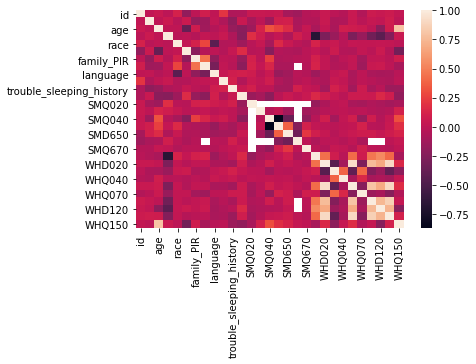

In [15]:
sns.heatmap(df.corr())